In [1]:
#en este dataset para ver el rendimiento de estudiantes incluso factores como de su vida personal

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg

spark = SparkSession.builder.appName("StudentsGrades").getOrCreate()

In [20]:
df = spark.read.json("hdfs://namenode:8020/user/hadoop/Students_Grades.JSON", multiLine = True)

In [21]:
df.printSchema()

root
 |-- Age: long (nullable = true)
 |-- Assignments_Avg: double (nullable = true)
 |-- Attendance (%): double (nullable = true)
 |-- Department: string (nullable = true)
 |-- Email: string (nullable = true)
 |-- Extracurricular_Activities: string (nullable = true)
 |-- Family_Income_Level: string (nullable = true)
 |-- Final_Score: double (nullable = true)
 |-- First_Name: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Grade: string (nullable = true)
 |-- Internet_Access_at_Home: string (nullable = true)
 |-- Last_Name: string (nullable = true)
 |-- Midterm_Score: double (nullable = true)
 |-- Parent_Education_Level: string (nullable = true)
 |-- Participation_Score: double (nullable = true)
 |-- Projects_Score: double (nullable = true)
 |-- Quizzes_Avg: double (nullable = true)
 |-- Sleep_Hours_per_Night: double (nullable = true)
 |-- Stress_Level (1-10): long (nullable = true)
 |-- Student_ID: string (nullable = true)
 |-- Study_Hours_per_Week: double (nullabl

In [32]:
df.show()

+---+---------------+--------------+-----------+--------------------+--------------------------+-------------------+-----------+----------+------+-----+-----------------------+---------+-------------+----------------------+-------------------+--------------+-----------+---------------------+-------------------+----------+--------------------+-----------+
|Age|Assignments_Avg|Attendance (%)| Department|               Email|Extracurricular_Activities|Family_Income_Level|Final_Score|First_Name|Gender|Grade|Internet_Access_at_Home|Last_Name|Midterm_Score|Parent_Education_Level|Participation_Score|Projects_Score|Quizzes_Avg|Sleep_Hours_per_Night|Stress_Level (1-10)|Student_ID|Study_Hours_per_Week|Total_Score|
+---+---------------+--------------+-----------+--------------------+--------------------------+-------------------+-----------+----------+------+-----+-----------------------+---------+-------------+----------------------+-------------------+--------------+-----------+----------------

In [33]:
#Veremos si las horas de estudio resulta un promedio mas alto

In [34]:
selected_col = [ "Total_Score", "Study_Hours_per_Week"]

In [35]:
study_vs_score = df.select("Study_Hours_per_Week", "Total_Score").toPandas()
study_vs_score = study_vs_score.dropna()

In [36]:
study_vs_score["Study_Hours_Group"] = pd.cut(
    study_vs_score["Study_Hours_per_Week"],
    bins=[0, 5, 10, 15, 20, 25, 30],
    labels=["0-5", "6-10", "11-15", "16-20", "21-25", "26-30"]
)

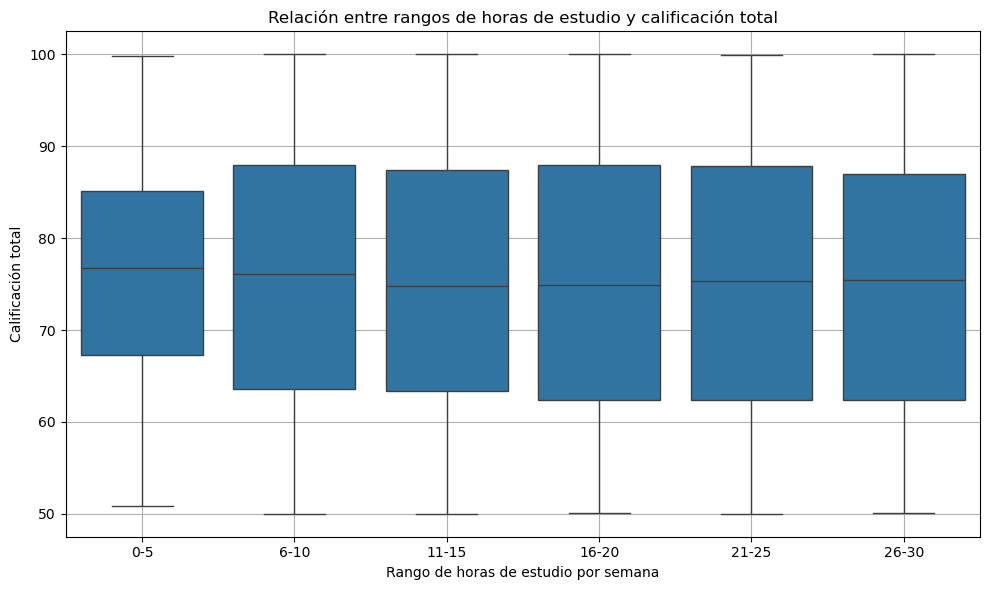

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(data=study_vs_score, x="Study_Hours_Group", y="Total_Score")
plt.title("Relación entre rangos de horas de estudio y calificación total")
plt.xlabel("Rango de horas de estudio por semana")
plt.ylabel("Calificación total")
plt.grid(True)
plt.tight_layout()
plt.show()

In [105]:
#Como se ve los resultados de la grafica no nos dice mucho ya que, no hay sufiente dispercion, o esto podria significar que
#las horas de estudio no tiene mucho impacto en cuanto a calificacion final

In [106]:
#Entonces ahora veremos si el hecho de asitir mas a clase afectara el Grade

In [107]:
df_pd = df.select("Grade", "Total_Score").toPandas().dropna()

In [108]:
attendance_score = ["Grade", "Attendance (%)"]

In [109]:
atten_vs_Grade = df.select("Attendance (%)", "Grade").toPandas()
atten_vs_Grade = atten_vs_Grade.dropna()

In [110]:
grade_map = {'A': 100, 'B': 3, 'C': 2, 'D': 1, 'F': 0}
atten_vs_Grade["Grade_numeric"] = atten_vs_Grade["Grade"].map(grade_map)

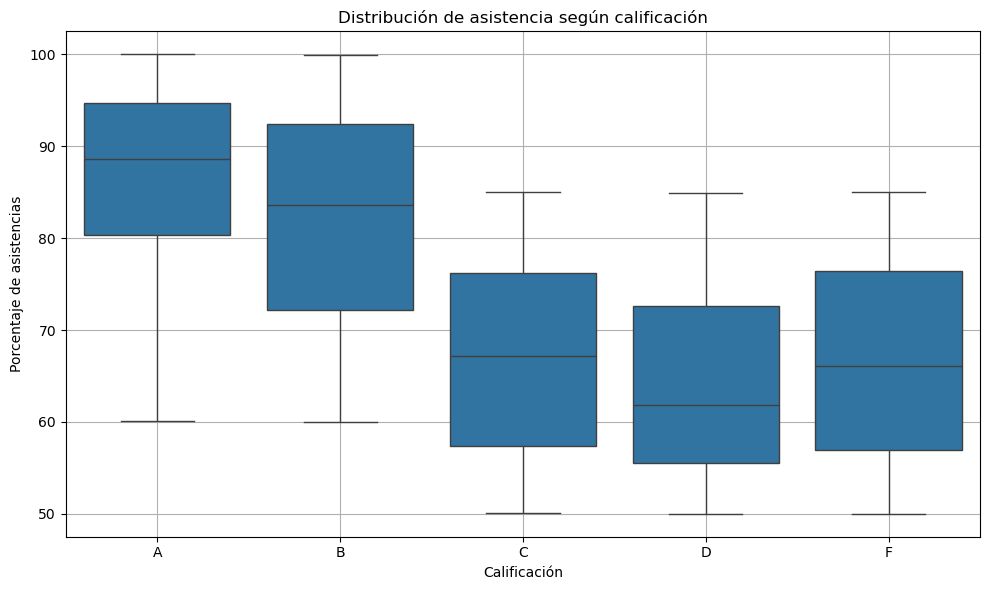

In [111]:
plt.figure(figsize=(10,6))
sns.boxplot(data=atten_vs_Grade, x="Grade", y="Attendance (%)", order=['A', 'B', 'C', 'D', 'F'])
plt.title("Distribución de asistencia según calificación")
plt.xlabel("Calificación")
plt.ylabel("Porcentaje de asistencias")
plt.grid(True)
plt.tight_layout()
plt.show()

In [90]:
#Aqui si alcanzamos ver una relacion donde, los alumnos con mayor asistencia teniendo una Calificacion alta (A)